In [1]:
from oop_functions.analytics_functions import run_classifier, performance_analysis
from oop_functions.missing_values_functions import print_records_vs_unique, impute_with_val
from oop_functions.util_functions import summarize_features, print_df, get_cols_missing_percentage, \
    get_unique_combinations
from processing_functions import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.ensemble import (RandomForestClassifier)
from sklearn.feature_selection import (SelectFromModel, SelectKBest, f_classif)
from sklearn.metrics import (f1_score)
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import time
import xgboost as xgb
from scipy.spatial import distance
import itertools


In [2]:
processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)
missing_df = pd.read_csv('./missing_features/combined_missing.csv', index_col=0)

In [3]:
screen_data_cols = ['study_yr', 'detl_p', 'detr_p', 'lvol_p', 'rvol_p', 'lvol_q', 'rvol_q',
       'lantero_p', 'lantero_q', 'llong_p', 'llong_q', 'ltran_p', 'ltran_q',
       'rantero_p', 'rantero_q', 'rlong_p', 'rlong_q', 'rtran_p', 'rtran_q',
       'tvu_ref', 'phycons', 'tvu_result', 'ca125_result', 'ovar_result',
       'ovcyst_solidr', 'ovcyst_outliner', 'ovcyst_solidl', 'ovcyst_outlinel',
       'ovcyst_solid', 'ovcyst_outline', 'ovcyst_diamr', 'ovcyst_diaml',
       'ovcyst_diam', 'ovcyst_volr', 'ovcyst_voll', 'ovcyst_vol',
       'ovcyst_morphr', 'ovcyst_morphl', 'ovcyst_morph', 'ovcyst_sumr',
       'ovcyst_suml', 'ovcyst_sum', 'ovary_diam', 'ovary_diamr', 'ovary_diaml',
       'ovary_volr', 'ovary_voll', 'ovary_vol', 'visl', 'visr', 'visboth',
       'viseith', 'numcystl', 'numcystr', 'numcyst', 'plco_id', 'ovar_days']

screen_abnorm_data_cols = ['study_yr', 'solid', 'sepst', 'cyst', 'cystw', 'echo', 'maxdi', 'volum',
       'plco_id']

screened_cols = screen_data_cols + screen_abnorm_data_cols + ['ca125ii', 'ca125_result']

## Merging Datasets

I realized that I was doing labeled mean imputation, which should not happen. So, I performed imputation after I merged cancer and no_cancer datasets back together. Without labeled mean imputation, gaussian NB and logistic regression do not perform well. 

run experiments with decision tree and remove the top feature every time. Store the depth of the tree, the efficacy of the top feature, its value, accuracy, confusion matrix

https://stackoverflow.com/questions/62819569/how-to-return-the-features-that-used-in-decision-tree-that-created-by-decisiontr

`TODO:` Run model purely on family history variables vs purely on screen variables. 

`TODO:` turn all of this into OOP programming

`TODO:` include the level of missingness for a particular features of a tree in order of usage.

`TODO:` divide them as FP and FN?

`TODO:` only keep columns with more than 1 unique value? 

`TODO:` make spreadsheet with model performance for 1,3,5,10 years. Print out trees, top 5 features. Send models

`TODO:` try SVM or ML models

`TODO:` At what point they were misclassified (e.g. at what point they diverge compared to the similar point with different prediction.) Look at the nearest neightbors with different neightbors. 

In [9]:
def isin_filter(df: pd.DataFrame, col: str, values: List):
    return df[df[col].isin(values)]

# filtered_on = list(itertools.chain.from_iterable([zip([key]*len(vals), vals) for key, vals in differentiate_confusion_matrix_over.items()]))
# TODO: finish this one
differentiate_confusion_matrix_over = {
    'was_screened': [
        ([0], lambda df: isin_filter(df, 'was_screened', [0])), 
        ([1], lambda df: isin_filter(df, 'was_screened', [1]))
    ], 
    'ovar_histtype': [[2], [2, 4, 6, 8, 9, 31]]
}

In [10]:
list(itertools.chain.from_iterable([zip([key]*len(vals), vals) for key, vals in differentiate_confusion_matrix_over.items()]))

[('was_screened', [0]),
 ('was_screened', [1]),
 ('ovar_histtype', [2]),
 ('ovar_histtype', [2, 4, 6, 8, 9, 31])]

336206
Distribution of labels based on unique plco_id: 0.21153846153846154
Distribution of labels based on duplicate plco_id: 0.1761827079934747
Threshold: 1
Threshold: 1
Threshold: 1
Threshold: 1
Threshold: 1


Cross-Validation measures:
+--------------------+-----------+-------------+-----------+-----------+
|                    |      mean |         std |       min |       max |
|--------------------+-----------+-------------+-----------+-----------|
| precision__class_0 | 0.999215  | 1.59752e-05 | 0.999197  | 0.99923   |
| recall__class_0    | 0.981463  | 0.00264837  | 0.978024  | 0.984754  |
| f1-score__class_0  | 0.990258  | 0.00134651  | 0.98851   | 0.991939  |
| precision__class_1 | 0.0482709 | 0.00647656  | 0.0409357 | 0.0579577 |
| recall__class_1    | 0.545614  | 0.00960917  | 0.535088  | 0.552632  |
| f1-score__class_1  | 0.0885957 | 0.0108924   | 0.076225  | 0.104913  |
| accuracy           | 0.980725  | 0.00263833  | 0.977303  | 0.984022  |
| auc                | 0.917675

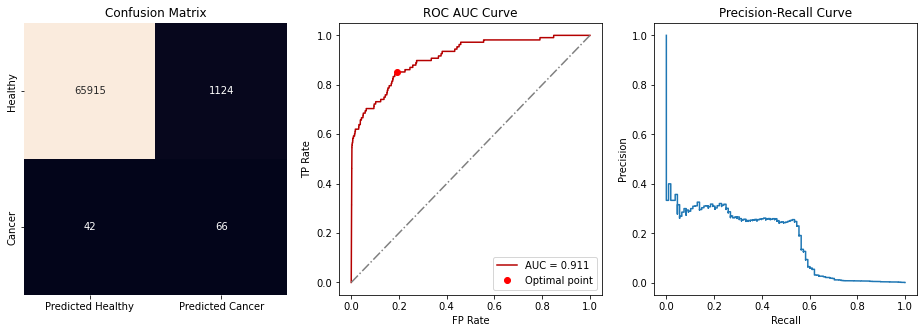

Threshold: 0.1369708627462387
     precision    recall  f1-score  support
0.0   0.999687  0.809932  0.894860  67039.0
1.0   0.007091  0.842593  0.014064    108.0
ROC AUC score: 0.9108756069573654
Accuracy Score: 0.8099840648130222
0.13697086


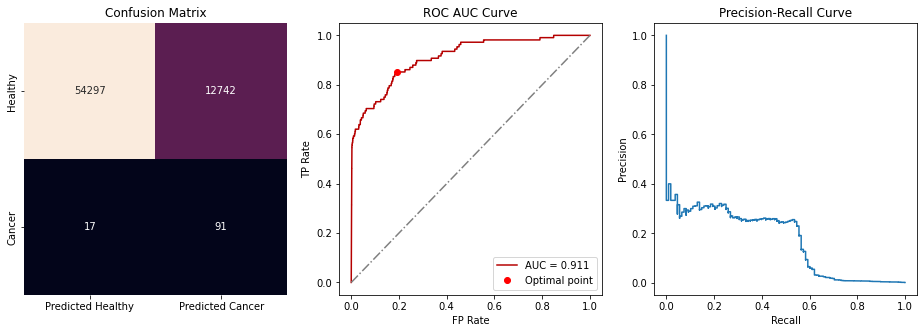

0.13697086
Filtered on: ('was_screened', [0])
     precision    recall  f1-score  support
0.0   1.000000  0.010101  0.020000    198.0
1.0   0.225296  1.000000  0.367742     57.0
ROC AUC score: 0.5944533049796208
Accuracy Score: 0.23137254901960785
0.99274373


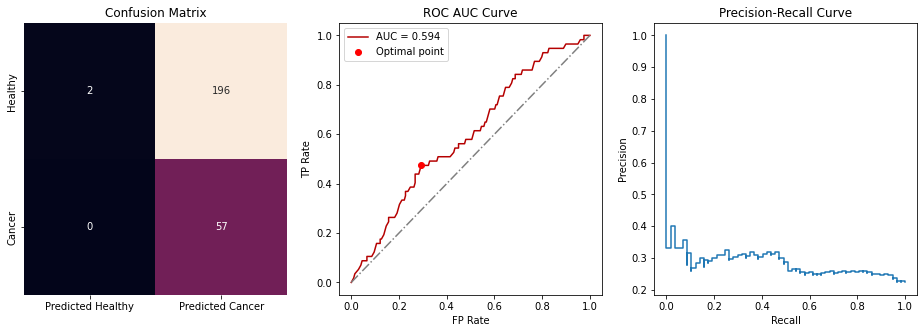

Filtered on: ('was_screened', [1])
     precision    recall  f1-score  support
0.0   0.999363  0.986116  0.992696  66841.0
1.0   0.009605  0.176471  0.018219     51.0
ROC AUC score: 0.8150505545645197
Accuracy Score: 0.985499013334928
0.08695464


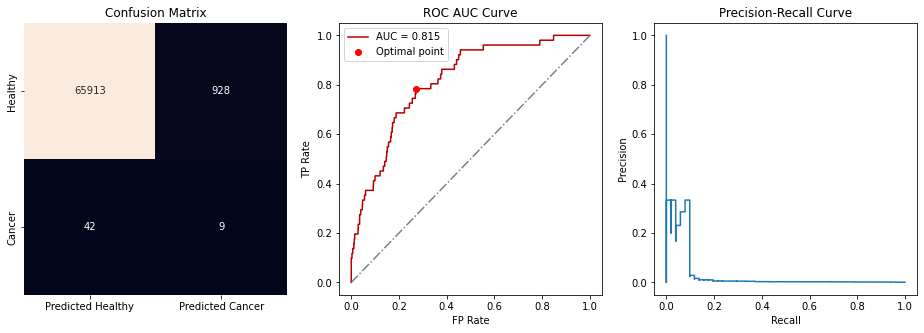

Filtered on: ('ovar_histtype', [2])
     precision    recall  f1-score  support
0.0   0.882609  0.630435  0.735507    322.0
1.0   0.237179  0.578125  0.336364     64.0
ROC AUC score: 0.6844914596273293
Accuracy Score: 0.6217616580310881
0.08861638


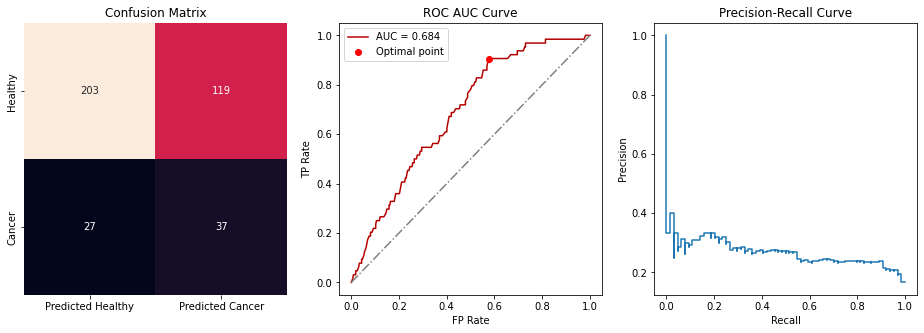

Filtered on: ('ovar_histtype', [2, 4, 6, 8, 9, 31])
     precision    recall  f1-score  support
0.0   0.872611  0.590517  0.704370    464.0
1.0   0.243028  0.603960  0.346591    101.0
ROC AUC score: 0.6648706896551725
Accuracy Score: 0.5929203539823009
0.08695464


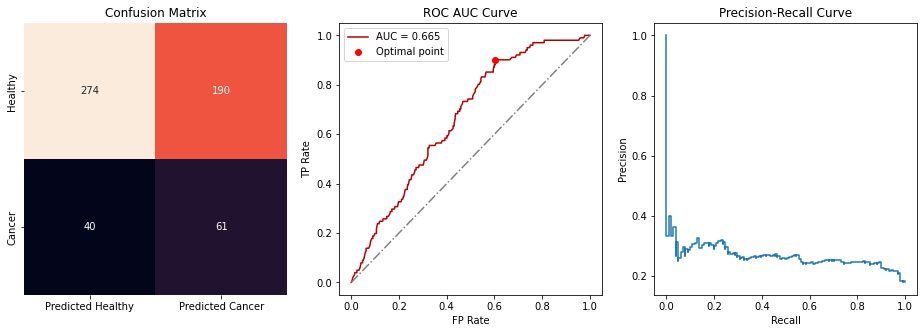

In [14]:
classifiers = {
    # 'LogisticRegression': LogisticRegression(C= 0.25, random_state= 0),
    # 'GaussianNB': GaussianNB(var_smoothing= 1e-09),
    # 'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'entropy'),
    # 'RandomForestClassifier': RandomForestClassifier(criterion= 'entropy', n_estimators= 200),
    'XGBClassifier': XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
}
years = [1]
drop_n_features = 1
cv=True
for year in years:
    experiment_data_helper = ExperimentDataHelper1(processed_data, label, ['cancer_'])
    experiment_runner = ExperimentRunner(classifier, experiment_data_helper, missing_df, test_n_folds=3)
    cv_analytics_util = experiment_runner.run_experiment()


In [15]:
len(X_test_mismatch)

42

In [16]:
false_negatives = pd.concat(np.array(X_test_mismatch)[:, 0])
false_negatives = false_negatives[false_negatives['cancer_in_next_1_years_prob'] < 0.14151879]
print_df(false_negatives)

+-------+-------+------------+-------------+-------+---------+----------+------------+-----------+-----------+-----------------+----------+-----------+----------+-----------+------------+------------+----------+-------------+-----------------+-----------------+--------------+------------+----------------+-----------------+----------+------------+------------+-------------+---------+-----------+---------------------+-----------+---------+---------+----------+----------+--------------+--------------+--------+---------+----------+------------+-----------------+-----------+-------------+--------------+-----------+--------------+------------+------------+--------------+----------+-------------+--------------+------------+-----------+--------+----------+-----------------------+-------------+-------------+---------+---------------------+-----------+-----------+-----------+-----------+-----------+----------+----------+-----------------+-----------+---------+-----------+---------------------+--

In [17]:
len(false_negatives)

17

In [18]:
print_df(pd.concat(X_test_mismatch[1][:2]))

+--------+-------+------------+-------------+-------+---------+-------+------------+-----------+-----------+-----------------+----------+-----------+----------+-----------+------------+------------+----------+-------------+-----------------+-----------------+--------------+------------+----------------+-----------------+----------+------------+------------+-------------+---------+-----------+---------------------+-----------+---------+---------+----------+----------+--------------+--------------+--------+---------+----------+------------+-----------------+-----------+-------------+--------------+-----------+--------------+------------+------------+--------------+----------+-------------+--------------+------------+-----------+--------+----------+-----------------------+-------------+-------------+---------+---------------------+-----------+-----------+-----------+-----------+-----------+----------+----------+-----------------+-----------+---------+-----------+---------------------+----

In [19]:
# drop col if the feature value of patient that was misclassified does not appear in the list of feature values of patients that were classified
df = pd.concat(X_test_mismatch[1][:2])
for col in df.columns:
    if df[col].iloc[0] in df[col].iloc[list(range(1, 6))].to_list():
        df.drop(col,inplace=True,axis=1)
print_df(df)
summary = summarize_features(df)

+--------+----------+------------+----------+-------------+---------+-----------+-----------+-----------+----------+--------------+---------------+-------------+--------------+---------------+--------------+-------------+-------------+-----------+-----------+-----------+----------+-----------+--------------+------------+--------------------------+-------------------------------+-------------------------------+------------+
|        |   bmi_50 |   bmi_curr |   bq_age |   lantero_p |   livec |   llong_p |   lmenstr |   ltran_p |   lvol_p |   ovary_diam |   ovary_diaml |   ovary_vol |   ovary_voll |   ovcyst_diam |   ph_any_dhq |   rantero_p |   rantero_q |   rlong_q |   rtran_p |   rtran_q |   rvol_q |   trypreg |   weight50_f |   weight_f |   cancer_in_next_1_years |   cancer_in_next_1_years_pred |   cancer_in_next_1_years_prob |   distance |
|--------+----------+------------+----------+-------------+---------+-----------+-----------+-----------+----------+--------------+---------------

In [20]:

df = pd.concat(X_test_mismatch[4][:2])
for col in df.columns:
    if len(df[col].unique()) <= 2:
        df.drop(col,inplace=True,axis=1)
print_df(df)
summary = summarize_features(df)
print_df(summary)

+--------+-------+------------+-----------+----------+----------+------------+----------+------------+-----------------+----------+----------+-----------+-----------+------------+----------+-------------+---------+-----------+-----------+----------+-----------------+-----------+---------------------+-----------+--------------+---------------+---------------+-------------+--------------+--------------+---------------+--------------+---------------+--------------+--------------+---------+-------------+-----------+-----------+----------+-----------+---------+-----------+--------------+--------------+------------+------------+
|        |   age |   agelevel |   bcontrt |   bmi_20 |   bmi_50 |   bmi_curr |   bq_age |   brothers |   ca125ii_level |   center |   educat |   fchilda |   fmenstr |   height_f |   ibuppd |   lantero_p |   livec |   llong_p |   ltran_p |   lvol_p |   mammo_history |   menstrs |   menstrs_stat_type |   occupat |   ovary_diam |   ovary_diaml |   ovary_diamr |   ovary_